In [1]:
%cd ..

/Users/crupley/gal/hoodie


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import cPickle as pickle
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from code.clusterize import *

In [3]:
df = pickle.load(open('featuresdf.pkl', 'rb'))
df.shape

(7334, 11)

In [4]:
fnums = {0: 'taxable_value',
         1: 'grocery',
         2: 'restaurant',
         3: 'retail',
         4: 'ncrimes',
         5: 'sgnf',
         6: 'avg_hh_size',
         7: 'population',
         8: 'walkscore'}

In [5]:
cnum = cut2cluster('010405', 20)

In [6]:
df = df.ix[cnum.index]
df.shape

(7325, 11)

In [64]:
features = [fnums[n] for n in [1, 4, 5]]
features

['grocery', 'ncrimes', 'sgnf']

In [32]:
fdf = df[[fnums[n] for n in [1, 4, 5]]]
fdf.shape

(7325, 3)

In [8]:
km = KMeans(n_clusters=20, n_jobs=-1)
km.fit(fdf)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=20, n_init=10,
    n_jobs=-1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [9]:
yhat = km.predict(fdf)

In [10]:
yhat

array([ 2, 16,  2, ...,  2,  5,  5], dtype=int32)

In [11]:
wcssn = wcss(fdf, cnum)
wcsskm = wcss(fdf, yhat)

In [12]:
print wcssn.sum()
print wcsskm.sum()

14311.5137978
1527.14476659


#kmeans clusters

/Users/crupley/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


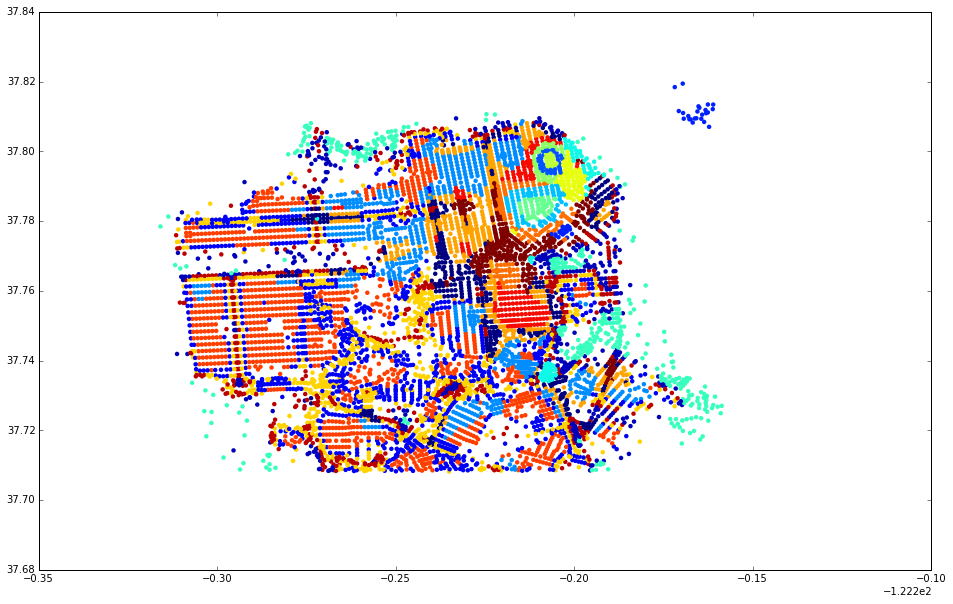

In [13]:
plt.figure(figsize = (16, 10))
plt.scatter(df.lon, df.lat, c=yhat, linewidths = 0)

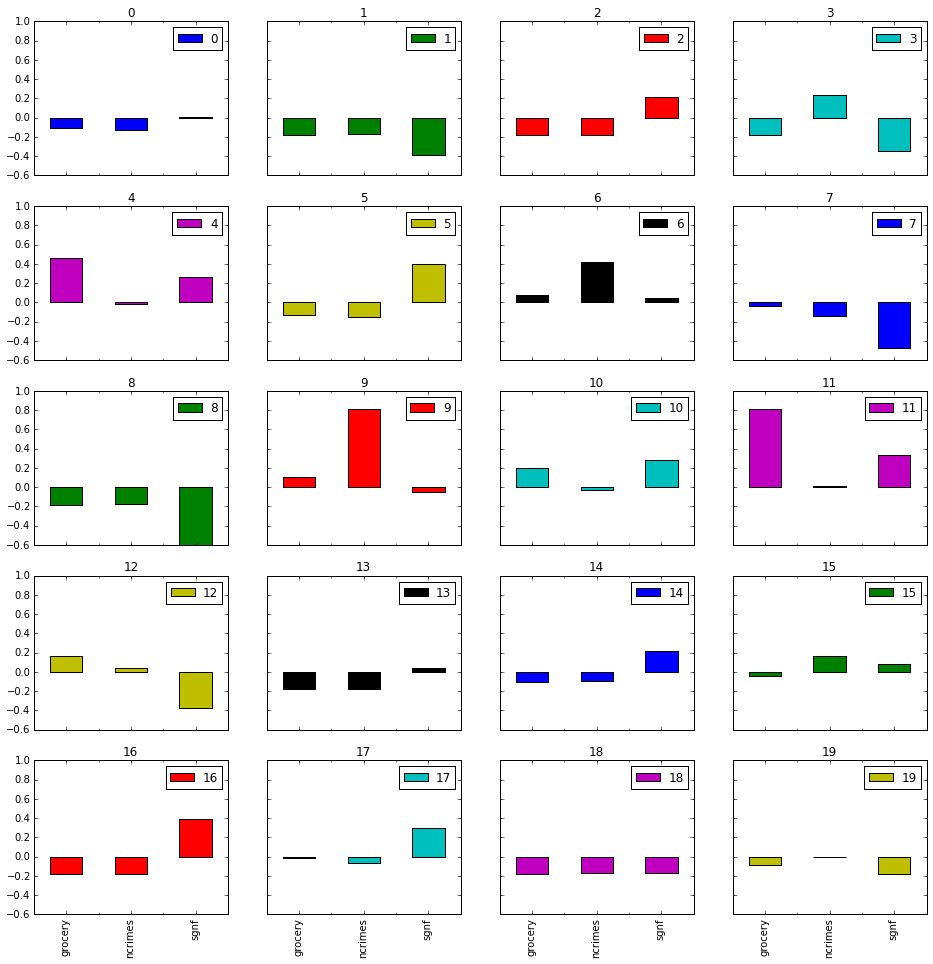

In [33]:
feature_bars(fdf, yhat, figsize=(16, 16), layout=(5,4))

# neighborhood cluster results

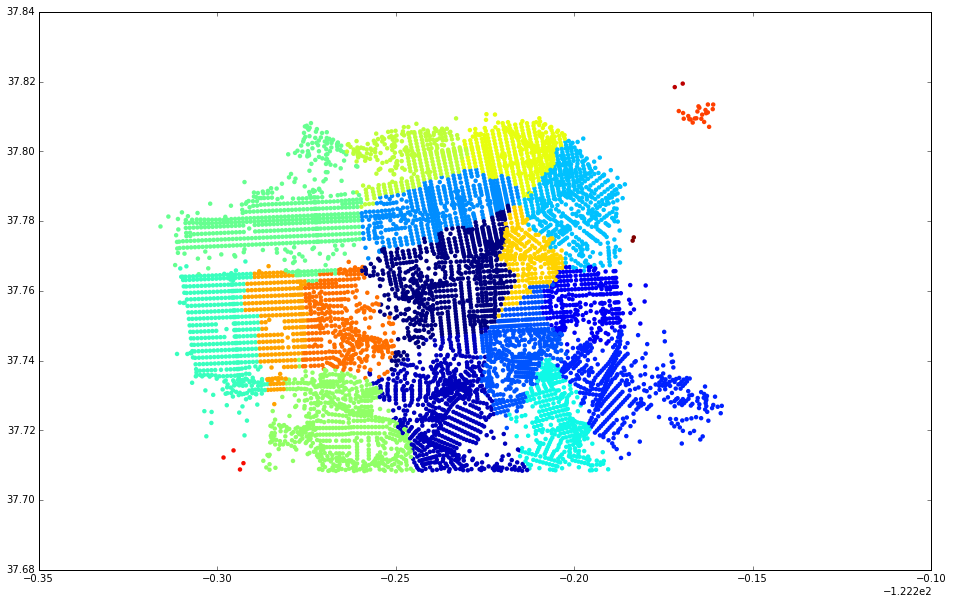

In [30]:
plt.figure(figsize = (16, 10))
plt.scatter(df.lon, df.lat, c=cnum, linewidths = 0)

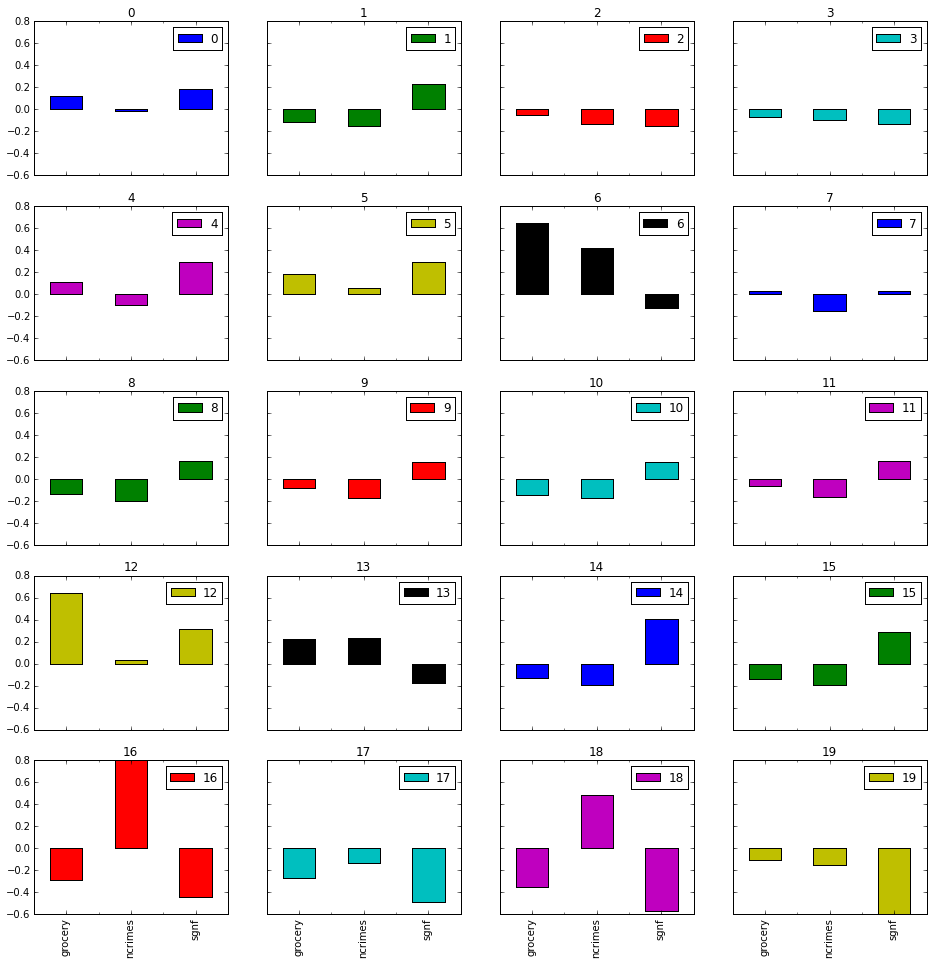

In [31]:
feature_bars(fdf.drop('yhat', axis=1), cnum, figsize=(16, 16), layout=(5,4))

In [62]:
%matplotlib notebook

In [69]:
%matplotlib inline

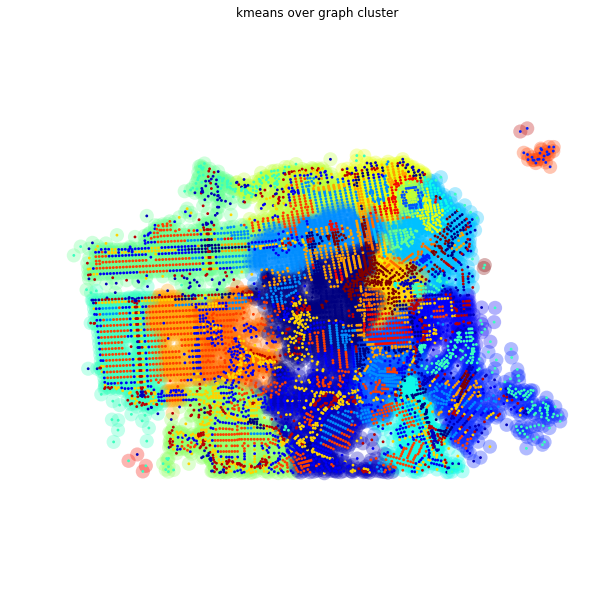

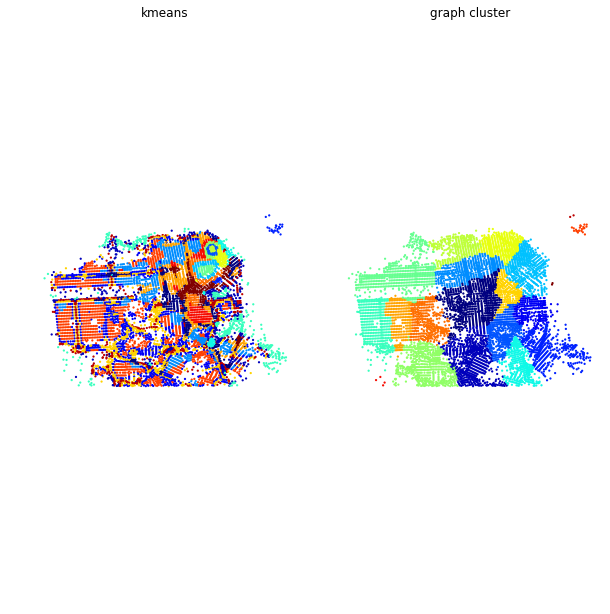

In [84]:
plt.figure(figsize = (10, 10))
plt.scatter(df.lon, df.lat, c=cnum, linewidths = 0, s=200, alpha=0.3)
plt.scatter(df.lon, df.lat, c=yhat, linewidths = 0, s=8)
plt.axis('equal')
plt.axis('off')
plt.margins(0)
plt.title('kmeans over graph cluster')

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.scatter(df.lon, df.lat, c=yhat, linewidths = 0, s=5)
plt.axis('equal')
plt.axis('off')
plt.margins(0)
plt.title('kmeans')

plt.subplot(122)
plt.scatter(df.lon, df.lat, c=cnum, linewidths = 0, s=5)
plt.axis('equal')
plt.axis('off')
plt.margins(0)
plt.title('graph cluster');